# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [26]:
from utils import get_dataset, parse_image_fn
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import tensorflow as tf
import numpy as np
import io
from PIL import Image
%matplotlib inline

In [33]:
filenames = glob.glob('/app/project/processed_data/processed/*.tfrecord')
dataset = tf.data.TFRecordDataset(filenames)

class_count = {1: 0, 2: 0, 4: 0}
number_of_images = 0
mean_pixel_vals = []

parsed_image_dataset = dataset.map(parse_image_fn)
for image_features in parsed_image_dataset:
    number_of_images += 1
    object_classes = image_features['image/object/class/label'].numpy()
    for object in object_classes:
        class_count[object] += 1
    
    img = image_features['image/encoded'].numpy()
    img = np.array(Image.open(io.BytesIO(img)))
    mean_pixel_vals.append(np.mean(img))

print(f'Total number of images: {number_of_images}')

number_of_vehicles = class_count[1]
number_of_pedestrians = class_count[2]
number_of_cyclists = class_count[4]

Total number of images: 1997


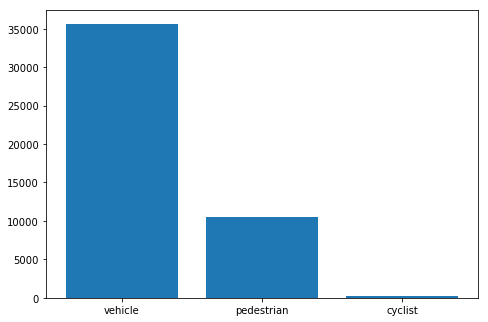

In [34]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['vehicle', 'pedestrian', 'cyclist']
values = [number_of_vehicles, number_of_pedestrians, number_of_cyclists]
ax.bar(labels, values)
plt.show()

1997


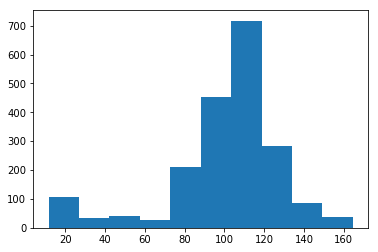

In [39]:
print(len(mean_pixel_vals))
plt.hist(mean_pixel_vals);

In [13]:
dataset = get_dataset("/app/project/processed_data/processed/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/app/project/processed_data/processed/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/app/project/processed_data/processed/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 100
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [14]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    class_color = {1: 'r', 2: 'g', 4: 'b'}
    
    image = batch['image'].numpy()
    print(image)
    bboxes = batch['groundtruth_boxes'].numpy()
    classes = batch['groundtruth_classes']
    
    img_height, img_width, _ = image.shape
    
    fig, ax = plt.subplots()
    ax.imshow(image)
    
    for box, obj_class in zip(bboxes, classes):
        x = box[1] * img_width
        y = box[0] * img_height
        height = (box[2] - box[0]) * img_height
        width = (box[3] - box[1]) * img_width
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor=class_color[obj_class.numpy()], facecolor='None')
        ax.add_patch(rect)
    
    plt.show()
    plt.close('all')

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

[[[62 36 13]
  [53 32  5]
  [59 42 12]
  ...
  [ 0  7  0]
  [ 8  4  3]
  [22 13 14]]

 [[56 34 11]
  [58 38 13]
  [55 40  9]
  ...
  [ 1  8  1]
  [10  4  4]
  [19  9 10]]

 [[54 39 16]
  [55 41 15]
  [55 44 14]
  ...
  [ 6  8  3]
  [19  9 10]
  [23  7 10]]

 ...

 [[42 27  0]
  [53 37  3]
  [54 31  0]
  ...
  [ 9  7  0]
  [17  9  6]
  [13  3  2]]

 [[61 41  6]
  [56 36  1]
  [56 36  0]
  ...
  [ 9  5  0]
  [18  9  4]
  [16  5  3]]

 [[56 34  0]
  [54 34  0]
  [65 45  8]
  ...
  [11  8  0]
  [18  9  4]
  [19  8  6]]]


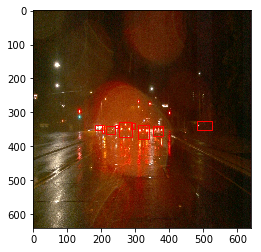

[[[ 75 112 164]
  [ 73 110 162]
  [ 71 111 162]
  ...
  [ 68 110 158]
  [ 68 108 157]
  [ 67 107 156]]

 [[ 72 109 161]
  [ 71 111 162]
  [ 72 112 163]
  ...
  [ 67 109 157]
  [ 67 107 156]
  [ 67 107 156]]

 [[ 72 112 163]
  [ 72 112 163]
  [ 73 113 164]
  ...
  [ 68 108 157]
  [ 69 107 156]
  [ 70 108 157]]

 ...

 [[ 24  55  73]
  [ 25  56  74]
  [ 31  60  78]
  ...
  [ 12  41  59]
  [  5  38  53]
  [  4  40  54]]

 [[ 29  58  74]
  [ 27  56  72]
  [ 31  60  76]
  ...
  [ 14  43  61]
  [  5  38  53]
  [  6  44  57]]

 [[ 33  60  77]
  [ 30  57  74]
  [ 31  60  76]
  ...
  [ 17  46  64]
  [  5  38  53]
  [  8  46  59]]]


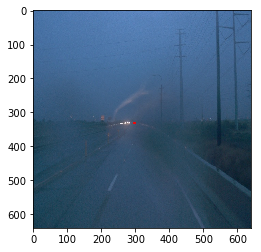

[[[ 77 119 161]
  [ 78 120 162]
  [ 79 121 163]
  ...
  [ 88 123 163]
  [ 89 124 164]
  [ 86 121 161]]

 [[ 75 117 159]
  [ 76 118 160]
  [ 77 119 161]
  ...
  [ 86 121 161]
  [ 89 124 164]
  [ 88 123 163]]

 [[ 79 118 161]
  [ 80 119 162]
  [ 80 119 162]
  ...
  [ 85 120 162]
  [ 86 123 165]
  [ 87 124 166]]

 ...

 [[ 53  63  65]
  [ 52  62  64]
  [ 55  65  67]
  ...
  [ 61  71  73]
  [ 62  72  74]
  [ 60  70  72]]

 [[ 54  62  65]
  [ 53  61  64]
  [ 55  63  66]
  ...
  [ 60  70  72]
  [ 61  71  73]
  [ 58  68  70]]

 [[ 54  62  65]
  [ 53  61  64]
  [ 52  60  63]
  ...
  [ 58  68  70]
  [ 61  71  73]
  [ 60  70  72]]]


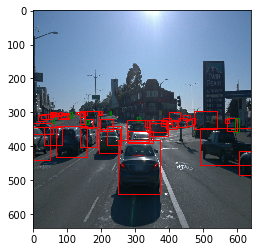

[[[215 186 146]
  [213 184 142]
  [216 184 143]
  ...
  [ 89 149 211]
  [ 90 150 212]
  [ 91 151 213]]

 [[210 181 141]
  [208 179 139]
  [212 180 139]
  ...
  [ 89 149 211]
  [ 90 150 212]
  [ 88 148 210]]

 [[210 182 142]
  [213 185 145]
  [211 182 140]
  ...
  [ 91 151 213]
  [ 91 151 213]
  [ 88 148 210]]

 ...

 [[ 51  63  63]
  [ 53  65  65]
  [ 50  64  67]
  ...
  [ 35  44  49]
  [ 36  43  49]
  [ 35  42  48]]

 [[ 52  62  63]
  [ 52  64  64]
  [ 49  63  66]
  ...
  [ 35  44  49]
  [ 37  44  50]
  [ 35  42  48]]

 [[ 56  66  67]
  [ 52  64  64]
  [ 58  69  73]
  ...
  [ 35  44  49]
  [ 36  43  49]
  [ 33  40  46]]]


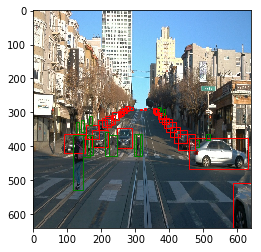

[[[ 94 124 158]
  [ 95 125 159]
  [ 94 124 158]
  ...
  [ 71 112 156]
  [ 69 110 154]
  [ 72 113 157]]

 [[ 94 124 158]
  [ 96 126 160]
  [ 95 125 159]
  ...
  [ 71 112 156]
  [ 70 111 155]
  [ 71 112 156]]

 [[ 95 125 159]
  [ 96 126 160]
  [ 95 125 159]
  ...
  [ 70 111 155]
  [ 71 112 156]
  [ 69 110 154]]

 ...

 [[ 73  77  89]
  [ 70  74  86]
  [ 70  74  85]
  ...
  [ 68  71  76]
  [ 66  69  76]
  [ 66  69  76]]

 [[ 74  78  90]
  [ 74  78  90]
  [ 72  76  88]
  ...
  [ 67  70  75]
  [ 66  69  76]
  [ 65  68  75]]

 [[ 75  79  91]
  [ 80  84  96]
  [ 73  77  89]
  ...
  [ 67  70  75]
  [ 68  71  78]
  [ 69  72  79]]]


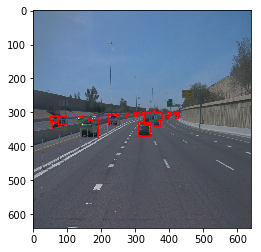

[[[103 180 250]
  [101 178 248]
  [101 178 248]
  ...
  [ 41  52  54]
  [ 66  71  77]
  [ 48  48  56]]

 [[106 183 253]
  [104 181 251]
  [104 181 251]
  ...
  [ 33  47  50]
  [ 47  54  60]
  [ 56  59  66]]

 [[100 177 247]
  [100 177 247]
  [102 179 249]
  ...
  [ 34  51  59]
  [ 21  32  38]
  [ 20  27  35]]

 ...

 [[  2   8   8]
  [  0   4   4]
  [  0   3   2]
  ...
  [  0   7  14]
  [  0   9  16]
  [  2  11  18]]

 [[  0   5   5]
  [  0   3   3]
  [  0   6   6]
  ...
  [  0   8  15]
  [  0  10  16]
  [  0  11  17]]

 [[  0   4   4]
  [  0   5   5]
  [  3   9   9]
  ...
  [  0   9  16]
  [  0  10  16]
  [  0  10  16]]]


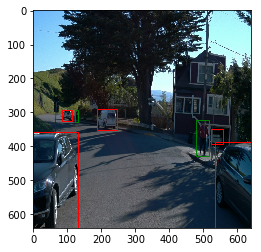

[[[ 57  99 149]
  [ 57  99 149]
  [ 57  99 149]
  ...
  [ 65 114 172]
  [ 68 115 167]
  [ 68 114 164]]

 [[ 55  97 147]
  [ 56  98 148]
  [ 57  99 149]
  ...
  [ 65 114 172]
  [ 68 115 167]
  [ 68 114 164]]

 [[ 56  98 148]
  [ 56  98 148]
  [ 57  99 149]
  ...
  [ 65 114 172]
  [ 68 115 167]
  [ 67 115 164]]

 ...

 [[ 73  74  79]
  [ 72  73  78]
  [ 72  73  78]
  ...
  [130 128 131]
  [128 128 130]
  [131 131 133]]

 [[ 71  74  79]
  [ 71  74  79]
  [ 72  73  78]
  ...
  [133 133 135]
  [132 132 134]
  [128 128 130]]

 [[ 69  72  77]
  [ 70  73  78]
  [ 73  74  79]
  ...
  [130 130 132]
  [130 130 132]
  [131 131 133]]]


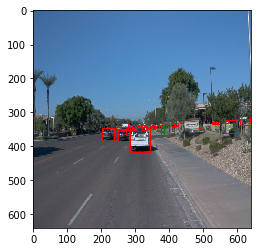

[[[159 179 206]
  [156 176 203]
  [162 181 211]
  ...
  [104 136 175]
  [103 135 174]
  [103 135 174]]

 [[160 180 207]
  [158 178 205]
  [158 177 207]
  ...
  [104 136 175]
  [104 136 175]
  [104 136 175]]

 [[159 179 206]
  [161 181 208]
  [159 178 208]
  ...
  [104 136 175]
  [104 136 175]
  [104 136 175]]

 ...

 [[ 37  47  49]
  [ 35  45  47]
  [ 38  46  49]
  ...
  [  7  13  13]
  [  6  12  12]
  [  6  12  12]]

 [[ 32  43  45]
  [ 32  43  45]
  [ 35  45  47]
  ...
  [  7  13  13]
  [  5  11  11]
  [  6  12  12]]

 [[ 36  47  49]
  [ 36  47  49]
  [ 38  48  50]
  ...
  [  6  12  12]
  [  4  10  10]
  [  4  10  10]]]


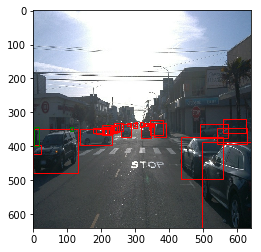

[[[126 190 238]
  [126 192 240]
  [124 195 241]
  ...
  [ 34  55  58]
  [ 62  86  96]
  [ 33  60  71]]

 [[134 198 246]
  [126 192 240]
  [131 202 248]
  ...
  [ 24  43  47]
  [ 42  65  73]
  [ 22  46  56]]

 [[140 206 254]
  [131 199 246]
  [137 210 255]
  ...
  [ 16  34  38]
  [ 25  44  51]
  [ 18  38  47]]

 ...

 [[  7  32  52]
  [  9  34  54]
  [ 12  34  55]
  ...
  [ 18  45  64]
  [ 20  45  65]
  [ 19  44  64]]

 [[  7  32  52]
  [  8  33  53]
  [ 11  33  54]
  ...
  [ 18  45  64]
  [ 19  46  65]
  [ 18  45  64]]

 [[  6  31  51]
  [  7  32  52]
  [  9  31  52]
  ...
  [ 22  49  68]
  [ 20  47  66]
  [ 15  42  61]]]


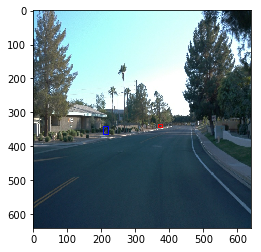

[[[ 65 105 157]
  [ 65 105 157]
  [ 64 105 157]
  ...
  [ 68 124 181]
  [ 68 125 180]
  [ 69 126 181]]

 [[ 65 105 157]
  [ 65 105 157]
  [ 64 105 157]
  ...
  [ 68 124 181]
  [ 69 126 181]
  [ 69 126 181]]

 [[ 65 106 158]
  [ 64 105 157]
  [ 64 105 157]
  ...
  [ 69 125 182]
  [ 69 125 182]
  [ 69 125 182]]

 ...

 [[ 75  76  81]
  [ 77  78  83]
  [ 78  79  84]
  ...
  [140 140 148]
  [140 143 148]
  [142 145 150]]

 [[ 74  75  80]
  [ 76  77  82]
  [ 78  79  84]
  ...
  [130 133 140]
  [130 133 138]
  [132 135 140]]

 [[ 75  76  81]
  [ 76  77  82]
  [ 76  77  82]
  ...
  [137 140 147]
  [137 140 145]
  [135 138 143]]]


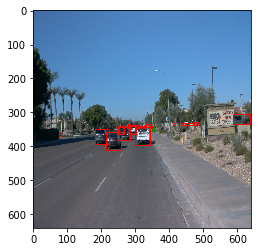

In [15]:
for batch in dataset.shuffle(10000).take(10):
    display_instances(batch)

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

### The distribuiton of the three objects in the dataset
A breakdown of the objects in the data, based on their class

In [ ]:
vehicle = 0    # id = 1
cyclist = 0    # id = 2
pedestrian = 0 # id = 4
count = 0

# for image in dataset.shuffle(100).take(1000):
for image in dataset:
    count += 1
print(count)
#     vehicle += np.count_nonzero(image['groundtruth_classes'].numpy() == 1)
#     cyclist += np.count_nonzero(image['groundtruth_classes'].numpy() == 2)
#     pedestrian += np.count_nonzero(image['groundtruth_classes'].numpy() == 4)

# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# labels = ['vehcile', 'cyclist', 'pedestrian']
# values = [vehicle, cyclist, pedestrian]
# ax.bar(labels, values)
# plt.show()

There is a very small number of pedestrians in the dataset, compared to cyclists and vehicles. The number of cyclists is also quite low compared to vehicles

### Pixel value analysis

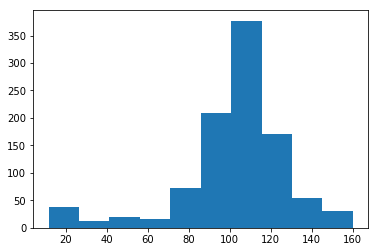

In [160]:
mean_px_vals = []
for image in dataset.shuffle(100).take(1000):
    img = image['image'].numpy()
    mean_px_vals.append(np.mean(img))

plt.hist(mean_px_vals);